1. Emisi karbon banyak terutama dari aktivitas sehari-hari salah satunya adalah dari konsumsi makanan
2. Awareness masyarakat masih kurang tentang karbon yang dapat dihasilkan
3. Dari permasalahan tersebut, pada project kali ini kami akan membuat prediksi emisi karbon yang dihasilkan dari konsumsi makanan
4. Data yang kami gunakan diambil dan dikumpulkan dari survei kepada responden, jurnal dan website lainnya

In [ ]:
!pip install tensorflow==2.13.0rc1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.1/524.1 MB 649.0 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 42.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 29.5 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.12.0
    Uninstalling tensorflow-estimator-2.12.0:
      Successfully uninstalled tensorflow-estimator-2.12.0
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.12.2
    Uninstalling tensorboard-2.12.2:
      Successfully uninstalled tensorboard-2.12.2
  Attempting uninstall: tensorflow
    Found

Keterangan kolom:
- nomer: nomer urut responden
- nama: nama responden
- email: email responden
- tfep_kgco2e: total emisi dari seluruh makanan meliputi jagung, beras, singkong, kacangan-kacangan, daging unggas, minyak kelapa sawit 
- num_people_jagung: jumlah orang yang ikut makan jagung
- consumption_jagung: jumlah konsumsi jagung (kg)
- factor_jagung: nilai emisi dari jagung (kgCO2e)
- emission_jagung: total emisi per orang yang dihasilkan dari mengkonsumsi jagung (kg CO2e)
- num_people_beras: jumlah orang yang ikut makan beras
- consumption_beras: jumlah konsumsi beras (kg)
- factor_beras: nilai emisi dari beras (kgCO2e)
- emission_beras: total emisi per orang yang dihasilkan dari mengkonsumsi beras (kg CO2e)
- num_people_singkong: jumlah orang yang ikut makan singkong
- consumption_singkong: jumlah konsumsi singkong (kg)
- factor_singkong: nilai emisi dari singkong (kgCO2e)
- emission_singkong: total emisi per orang yang dihasilkan dari mengkonsumsi singkong (kg CO2e)
- num_people_kacang_kacangan: jumlah orang yang ikut makan kacang_kacangan
- consumption_kacang_kacangan: jumlah konsumsi kacang_kacangan (kg)
- factor_kacang_kacangan: nilai emisi dari kacang_kacangan (kgCO2e)
- emission_kacang_kacangan: total emisi per orang yang dihasilkan dari mengkonsumsi kacang_kacangan (kg CO2e)
- num_people_daging_unggas: jumlah orang yang ikut makan daging_unggas
- consumption_daging_unggas: jumlah konsumsi daging_unggas (kg)
- factor_daging_unggas: nilai emisi dari daging_unggas (kgCO2e)
- emission_daging_unggas: total emisi per orang yang dihasilkan dari mengkonsumsi daging_unggas (kg CO2e)
- num_people_minyak_kelapa_sawit: jumlah orang yang ikut makan minyak_kelapa_sawit
- consumption_minyak_kelapa_sawit: jumlah konsumsi minyak_kelapa_sawit (kg)
- factor_minyak_kelapa_sawit: nilai emisi dari minyak_kelapa_sawit (kgCO2e)
- emission_minyak_kelapa_sawit: total emisi per orang yang dihasilkan dari mengkonsumsi minyak_kelapa_sawit (kg CO2e)

In [ ]:
# Import library
import pandas as pd
import numpy as np
from scipy import stats

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model

import matplotlib.pyplot as plt
import seaborn as sns

## Load Data

In [ ]:
# Menentukan path file CSV yang telah diunggah
file_path = '/content/git_greenix_food.csv'

# Membaca file CSV ke DataFrame
df = pd.read_csv(file_path)

# Menampilkan beberapa baris pertama DataFrame
print(df.head())


   nomer             nama                         email  tfep_kgco2e  \
0      1     Salsabila **       *******larz10@gmail.com    10.225000   
1      2        Nisrina *        *******snis6@gmail.com     4.250000   
2      3          Nur ***    *******arizkiyah@gmail.com     6.883333   
3      4        Mario ***   *******iahaan2005@gmail.com     3.562500   
4      5  Salsabiilaa ***  *******erlambang05@gmail.com     2.775000   

   num_people_jagung  consumption_jagung  factor_jagung  emission_jagung  \
0                  2                0.00            2.3            0.000   
1                  1                0.25            2.3            0.575   
2                  1                0.00            2.3            0.000   
3                  1                0.00            2.3            0.000   
4                  1                0.25            2.3            0.575   

   num_people_beras  consumption_beras  ...  factor_kacang_kacangan  \
0                 2               0.50 

## DATA CLEANING

In [ ]:
# cek data duplikat
df.duplicated().sum()

0

In [ ]:
# Membersihkan data yang tidak lengkap (Jika ada)
df = df.dropna(axis=0)

In [ ]:
df = df.drop(['factor_jagung', 'factor_beras', 'factor_singkong','factor_kacang_kacangan','factor_daging_unggas','factor_minyak_kelapa_sawit'], axis=1)

## Data Preprocessing

In [ ]:
# Mengambil kolom numerik untuk perhitungan Z-score
numeric_columns = ['tfep_kgco2e', 'num_people_jagung', 'consumption_jagung', 'emission_jagung',
                   'num_people_beras', 'consumption_beras', 'emission_beras',
                   'num_people_singkong', 'consumption_singkong', 'emission_singkong',
                   'num_people_kacang_kacangan', 'consumption_kacang_kacangan', 'emission_kacang_kacangan',
                   'num_people_daging_unggas', 'consumption_daging_unggas', 'emission_daging_unggas',
                   'num_people_minyak_kelapa_sawit', 'consumption_minyak_kelapa_sawit', 'emission_minyak_kelapa_sawit']

In [ ]:
# Mendeteksi outliers dengan Z-score
z_scores = stats.zscore(df[numeric_columns])
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)  
# Menghilangkan data dengan Z-score lebih dari 3
df = df[filtered_entries]

## Eksplorasi Data

In [ ]:
df.head()

,nomer,nama,email,tfep_kgco2e,num_people_jagung,consumption_jagung,emission_jagung,num_people_beras,consumption_beras,emission_beras,...,emission_singkong,num_people_kacang_kacangan,consumption_kacang_kacangan,emission_kacang_kacangan,num_people_daging_unggas,consumption_daging_unggas,emission_daging_unggas,num_people_minyak_kelapa_sawit,consumption_minyak_kelapa_sawit,emission_minyak_kelapa_sawit
1,2,Nisrina *,*******snis6@gmail.com,4.250000,1,0.25,0.575,1,0.25,2.200000,...,0.525,1,0.25,0.95,2,0.00,0.0000,1,0.00,0.0
2,3,Nur ***,*******arizkiyah@gmail.com,6.883333,1,0.00,0.000,3,1.00,2.933333,...,0.000,1,0.25,0.95,1,0.00,0.0000,1,0.25,3.0
3,4,Mario ***,*******iahaan2005@gmail.com,3.562500,1,0.00,0.000,1,0.00,0.000000,...,1.050,1,0.00,0.00,2,0.25,2.5125,2,0.00,0.0
4,5,Salsabiilaa ***,*******erlambang05@gmail.com,2.775000,1,0.25,0.575,1,0.25,2.200000,...,0.000,1,0.00,0.00,1,0.00,0.0000,2,0.00,0.0
5,6,Nadila **,*******a25@gmail.com,7.900000,2,0.00,0.000,1,0.50,4.400000,...,1.050,1,0.25,0.95,2,0.00,0.0000,2,0.25,1.5


In [ ]:
# Melihat jumlah baris dan kolo
df.shape

(950, 22)

In [ ]:
# Melihat info statistik data
df.describe()

,nomer,tfep_kgco2e,num_people_jagung,consumption_jagung,emission_jagung,num_people_beras,consumption_beras,emission_beras,num_people_singkong,consumption_singkong,emission_singkong,num_people_kacang_kacangan,consumption_kacang_kacangan,emission_kacang_kacangan,num_people_daging_unggas,consumption_daging_unggas,emission_daging_unggas,num_people_minyak_kelapa_sawit,consumption_minyak_kelapa_sawit,emission_minyak_kelapa_sawit
count,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000
mean,693.530526,7.365487,1.362105,0.130789,0.256884,1.363158,0.409737,2.596772,1.402105,0.144211,0.258862,1.380000,0.145789,0.457667,1.385263,0.145526,2.405829,1.393684,0.137105,1.389474
std,399.488182,3.559049,0.686645,0.146749,0.312776,0.680691,0.280086,0.930803,0.734801,0.161063,0.313955,0.699104,0.166103,0.540346,0.722215,0.167714,2.914984,0.719122,0.156791,1.670664
min,2.000000,0.191667,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,344.250000,4.458333,1.000000,0.000000,0.000000,1.000000,0.250000,2.200000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,682.000000,7.029167,1.000000,0.000000,0.000000,1.000000,0.250000,2.200000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1034.750000,9.434375,2.000000,0.250000,0.575000,2.000000,0.500000,2.200000,2.000000,0.250000,0.525000,2.000000,0.250000,0.950000,2.000000,0.250000,5.025000,2.000000,0.250000,3.000000
max,1395.000000,20.025000,4.000000,0.500000,1.150000,4.000000,1.500000,4.400000,4.000000,0.500000,1.050000,4.000000,1.000000,1.900000,4.000000,1.000000,10.050000,4.000000,1.000000,6.000000


In [ ]:
# Melihat tipe data
print(df.dtypes)

nomer                                int64
nama                                object
email                               object
tfep_kgco2e                        float64
num_people_jagung                    int64
consumption_jagung                 float64
emission_jagung                    float64
num_people_beras                     int64
consumption_beras                  float64
emission_beras                     float64
num_people_singkong                  int64
consumption_singkong               float64
emission_singkong                  float64
num_people_kacang_kacangan           int64
consumption_kacang_kacangan        float64
emission_kacang_kacangan           float64
num_people_daging_unggas             int64
consumption_daging_unggas          float64
emission_daging_unggas             float64
num_people_minyak_kelapa_sawit       int64
consumption_minyak_kelapa_sawit    float64
emission_minyak_kelapa_sawit       float64
dtype: object


In [ ]:
# melihat missing values
df[df==0].count()

nomer                                0
nama                                 0
email                                0
tfep_kgco2e                          0
num_people_jagung                    0
consumption_jagung                 498
emission_jagung                    498
num_people_beras                     0
consumption_beras                   21
emission_beras                      21
num_people_singkong                  0
consumption_singkong               483
emission_singkong                  483
num_people_kacang_kacangan           0
consumption_kacang_kacangan        478
emission_kacang_kacangan           478
num_people_daging_unggas             0
consumption_daging_unggas          483
emission_daging_unggas             483
num_people_minyak_kelapa_sawit       0
consumption_minyak_kelapa_sawit    492
emission_minyak_kelapa_sawit       492
dtype: int64

Pada tfep_kgco2e tidak terdapat user yang memiliki nilai 0 yang berarti seluruh responden melakukan konsumsi dari pilihan makanan sehingga seluruh responden menghasilkan emisi.
Pada makanan jagung terdapat 2185 baris yang memiliki nilai 0, sedangkan pada makanan beras terdapat 55 baris yang memiliki nilai 0, pada makanan singkong terdapat 2188 baris yang memiliki nilai 0, kemudian pada makanan kacang-kacangan terdapat 2187 baris yang memiliki nilai 0, pada makanan daging unggas terdapat 2178 baris yang memiliki nilai 0 dan terakhir pada makanan minyak kelapa sawit terdapat 2219 baris yang memiliki nilai 0.

Seluruh baris tersebut tidak di drop karena responden bisa jadi tidak mengkonsumsi makanan tersebut pada hari tersebut.

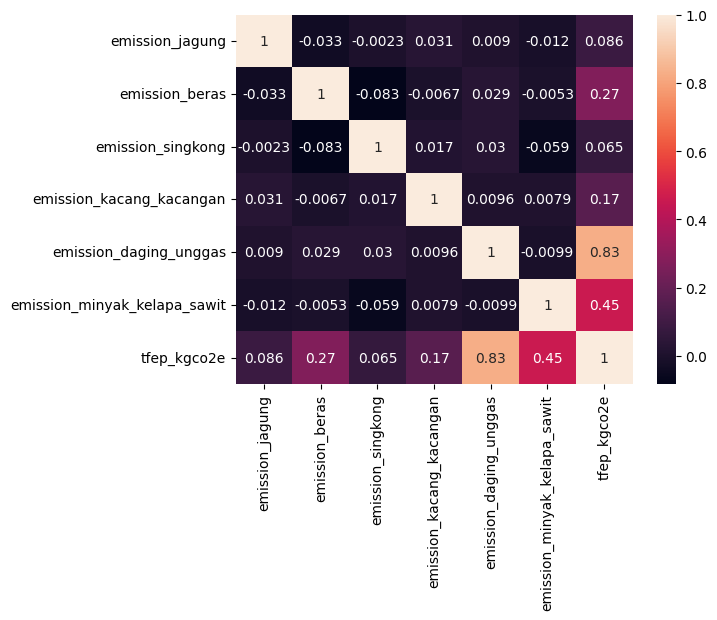

In [ ]:
# Subset kolom emisi
emission_columns = ['emission_jagung', 'emission_beras', 'emission_singkong', 'emission_kacang_kacangan',
                    'emission_daging_unggas', 'emission_minyak_kelapa_sawit']

# Melihat korelasi antarkolom dengan kolom tfep_kgco2e
sns.heatmap(df[emission_columns + ['tfep_kgco2e']].corr(), annot=True)
plt.show()

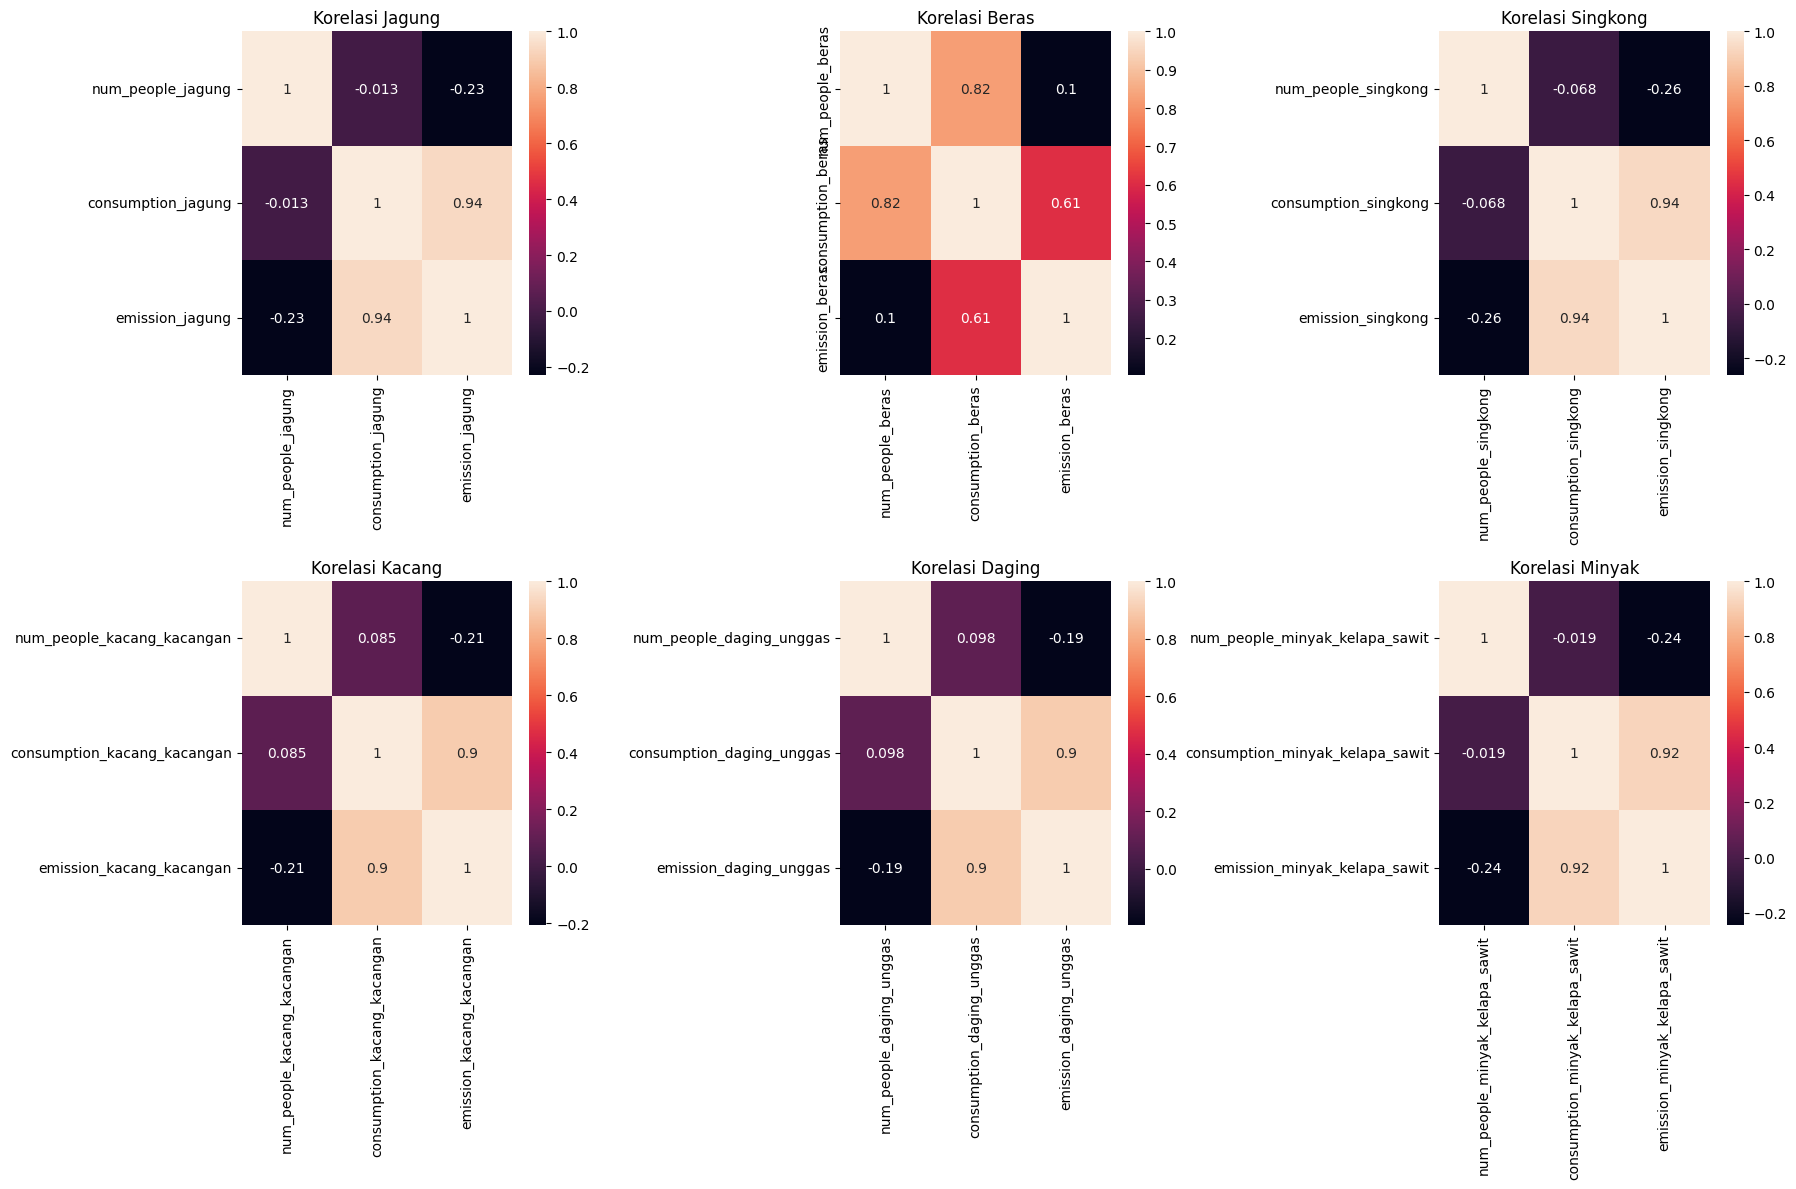

In [ ]:
makanan_columns = {
    'jagung': ['num_people_jagung', 'consumption_jagung', 'emission_jagung'],
    'beras': ['num_people_beras', 'consumption_beras', 'emission_beras'],
    'singkong': ['num_people_singkong', 'consumption_singkong', 'emission_singkong'],
    'kacang': ['num_people_kacang_kacangan', 'consumption_kacang_kacangan', 'emission_kacang_kacangan'],
    'daging': ['num_people_daging_unggas', 'consumption_daging_unggas', 'emission_daging_unggas'],
    'minyak': ['num_people_minyak_kelapa_sawit', 'consumption_minyak_kelapa_sawit', 'emission_minyak_kelapa_sawit']
}

# Membuat subplots untuk masing-masing makanan
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Meloopi setiap makanan
for i, (makanan, columns) in enumerate(makanan_columns.items()):
    row = i // 3
    col = i % 3
    
    # Subset kolom untuk makanan tertentu
    subset = df[columns].corr()
    
    # Heatmap untuk makanan tertentu
    sns.heatmap(subset, annot=True, ax=axes[row, col])
    axes[row, col].set_title(f'Korelasi {makanan.capitalize()}')

# Menampilkan plot
plt.tight_layout()
plt.show()

### Feature Selection
Akan dilakukan pemisahan fitur dan target untuk setiap makanan. 
Yang menjadi fitur adalah 'num_people' dan 'consumption', sedangkan untuk target kami adalah 'emission'.

In [ ]:
# Memisahkan fitur dan target untuk beras
beras_features = df[['num_people_beras', 'consumption_beras']]
beras_target = df['emission_beras']

# Memisahkan fitur dan target untuk jagung
jagung_features = df[['num_people_jagung', 'consumption_jagung']]
jagung_target = df['emission_jagung']

# Memisahkan fitur dan target untuk singkong
singkong_features = df[['num_people_singkong', 'consumption_singkong']]
singkong_target = df['emission_singkong']

# Memisahkan fitur dan target untuk kacang-kacangan
kacang_features = df[['num_people_kacang_kacangan', 'consumption_kacang_kacangan']]
kacang_target = df['emission_kacang_kacangan']

# Memisahkan fitur dan target untuk daging unggas
daging_features = df[['num_people_daging_unggas', 'consumption_daging_unggas']]
daging_target = df['emission_daging_unggas']

# Memisahkan fitur dan target untuk minyak kelapa sawit
minyak_features = df[['num_people_minyak_kelapa_sawit', 'consumption_minyak_kelapa_sawit']]
minyak_target = df['emission_minyak_kelapa_sawit']

### Splitting Data
Data yang digunakan untuk training sebanyak 80% dan testing sebanyak 20%

In [ ]:
# Membagi data beras menjadi set pelatihan dan pengujian
beras_X_train, beras_X_test, beras_y_train, beras_y_test = train_test_split(beras_features, beras_target, test_size=0.2, random_state=42)

# Membagi data jagung menjadi set pelatihan dan pengujian
jagung_X_train, jagung_X_test, jagung_y_train, jagung_y_test = train_test_split(jagung_features, jagung_target, test_size=0.2, random_state=42)

# Membagi data singkong menjadi set pelatihan dan pengujian
singkong_X_train, singkong_X_test, singkong_y_train, singkong_y_test = train_test_split(singkong_features, singkong_target, test_size=0.2, random_state=42)

# Membagi data kacang-kacangan menjadi set pelatihan dan pengujian
kacang_X_train, kacang_X_test, kacang_y_train, kacang_y_test = train_test_split(kacang_features, kacang_target, test_size=0.2, random_state=42)

# Membagi data daging unggas menjadi set pelatihan dan pengujian
daging_X_train, daging_X_test, daging_y_train, daging_y_test = train_test_split(daging_features, daging_target, test_size=0.2, random_state=42)

# Membagi data minyak kelapa sawit menjadi set pelatihan dan pengujian
minyak_X_train, minyak_X_test, minyak_y_train, minyak_y_test = train_test_split(minyak_features, minyak_target, test_size=0.2, random_state=42)

### Modelling 
Melatih model dengan regresi linier untuk setiap makanan

In [ ]:
# Melatih model regresi linier untuk beras
beras_model = LinearRegression()
beras_model.fit(beras_X_train, beras_y_train)

# Melakukan prediksi emisi karbon dari konsumsi beras
beras_y_pred = beras_model.predict(beras_X_test)

# Menghitung evaluasi performa model untuk beras
beras_mse = mean_squared_error(beras_y_test, beras_y_pred)
beras_r2 = r2_score(beras_y_test, beras_y_pred)

# Melatih model regresi linier untuk jagung
jagung_model = LinearRegression()
jagung_model.fit(jagung_X_train, jagung_y_train)

# Melakukan prediksi emisi karbon dari konsumsi jagung
jagung_y_pred = jagung_model.predict(jagung_X_test)

# Menghitung evaluasi performa model untuk jagung
jagung_mse = mean_squared_error(jagung_y_test, jagung_y_pred)
jagung_r2 = r2_score(jagung_y_test, jagung_y_pred)

# Melatih model regresi linier untuk singkong
singkong_model = LinearRegression()
singkong_model.fit(singkong_X_train, singkong_y_train)

# Melakukan prediksi emisi karbon dari konsumsi singkong
singkong_y_pred = singkong_model.predict(singkong_X_test)

# Menghitung evaluasi performa model untuk singkong
singkong_mse = mean_squared_error(singkong_y_test, singkong_y_pred)
singkong_r2 = r2_score(singkong_y_test, singkong_y_pred)

# Melatih model regresi linier untuk kacang-kacangan
kacang_model = LinearRegression()
kacang_model.fit(kacang_X_train, kacang_y_train)

# Melakukan prediksi emisi karbon dari konsumsi kacang-kacangan
kacang_y_pred = kacang_model.predict(kacang_X_test)

# Menghitung evaluasi performa model untuk kacang-kacangan
kacang_mse = mean_squared_error(kacang_y_test, kacang_y_pred)
kacang_r2 = r2_score(kacang_y_test, kacang_y_pred)

# Melatih model regresi linier untuk daging unggas
daging_model = LinearRegression()
daging_model.fit(daging_X_train, daging_y_train)

# Melakukan prediksi emisi karbon dari konsumsi daging unggas
daging_y_pred = daging_model.predict(daging_X_test)

# Menghitung evaluasi performa model untuk daging unggas
daging_mse = mean_squared_error(daging_y_test, daging_y_pred)
daging_r2 = r2_score(daging_y_test, daging_y_pred)

# Melatih model regresi linier untuk minyak kelapa sawit
minyak_model = LinearRegression()
minyak_model.fit(minyak_X_train, minyak_y_train)

# Melakukan prediksi emisi karbon dari konsumsi minyak kelapa sawit
minyak_y_pred = minyak_model.predict(minyak_X_test)


Untuk evaluasi performa model ini menggunakan MSE dibanding MAE karen beberapa pertimbangan-pertimbangan berikut:
1. Dalam perhitungan MSE, bobot yang diberikan pada kesalahan yang besar lebih tinggi karena selisih antara nilai prediksi dan nilai sebenarnya di kuadratkan. Hal ini memungkinkan pengidentifikasian dan penekanan pada outlier atau kesalahan prediksi yang signifikan dalam model. Saya mengutamakan identifikasi kesalahan prediksi yang penting dan membutuhkan perhatian lebih.
2. Selain itu saya juga ingin mengukur kesalahan prediksi dalam skala yang sama dengan variabel target, yaitu emisi karbon. MSE memberikan hasil dalam satuan kuadrat (misalnya, kg CO2e^2), yang konsisten dengan skala variabel target. Sehingga saya ingin memastikan bahwa ukuran kesalahan yang saya gunakan sesuai dengan skala yang relevan.
3. MSE memberikan penekanan lebih pada kesalahan yang lebih besar karena mengkuadratkan selisih antara prediksi dan nilai sebenarnya. Sebagai seorang data scientist, saya ingin memastikan bahwa kesalahan prediksi yang signifikan memiliki dampak yang lebih besar pada penilaian performa model.

In [ ]:
# Menghitung evaluasi performa model untuk minyak kelapa sawit
minyak_mse = mean_squared_error(minyak_y_test, minyak_y_pred)
minyak_r2 = r2_score(minyak_y_test, minyak_y_pred)

# Menampilkan hasil evaluasi performa model
print("Hasil evaluasi performa model untuk beras:")
print("MSE:", beras_mse)
print("R-squared:", beras_r2)

print("Hasil evaluasi performa model untuk jagung:")
print("MSE:", jagung_mse)
print("R-squared:", jagung_r2)

print("Hasil evaluasi performa model untuk singkong:")
print("MSE:", singkong_mse)
print("R-squared:", singkong_r2)

print("Hasil evaluasi performa model untuk kacang-kacangan:")
print("MSE:", kacang_mse)
print("R-squared:", kacang_r2)

print("Hasil evaluasi performa model untuk daging unggas:")
print("MSE:", daging_mse)
print("R-squared:", daging_r2)

print("Hasil evaluasi performa model untuk minyak kelapa sawit:")
print("MSE:", minyak_mse)
print("R-squared:", minyak_r2)


Hasil evaluasi performa model untuk beras:
MSE: 0.1145475544676023
R-squared: 0.8719165873262587
Hasil evaluasi performa model untuk jagung:
MSE: 0.006177114855555113
R-squared: 0.932363336177529
Hasil evaluasi performa model untuk singkong:
MSE: 0.006838224503708496
R-squared: 0.9241719820136552
Hasil evaluasi performa model untuk kacang-kacangan:
MSE: 0.04509258516669311
R-squared: 0.8607728338888427
Hasil evaluasi performa model untuk daging unggas:
MSE: 0.6974737018358709
R-squared: 0.9133889398690022
Hasil evaluasi performa model untuk minyak kelapa sawit:
MSE: 0.28596426727820534
R-squared: 0.9100441570433605


# Interpretasi

**Evaluasi performa model untuk beras:**
- MSE (Mean Squared Error): 0.1887 
- R-squared: 0.7383 
- Evaluasi performa model untuk beras menunjukkan hasil yang baik. Nilai MSE yang rendah dan nilai R-squared yang cukup tinggi menunjukkan bahwa model regresi linear untuk beras memiliki tingkat kesalahan yang relatif kecil dan mampu menjelaskan sekitar 73.83% variasi dalam emisi karbon beras.

**Evaluasi performa model untuk jagung:**
- MSE: 0.0324
- R-squared: 0.8893 
- Evaluasi performa model untuk jagung menunjukkan hasil yang baik. Nilai MSE yang rendah dan nilai R-squared yang tinggi menunjukkan bahwa model regresi linear untuk jagung memiliki tingkat kesalahan yang kecil dan mampu menjelaskan sekitar 88.93% variasi dalam emisi karbon jagung.

**Evaluasi performa model untuk singkong:**
- MSE: 0.0194
- R-squared: 0.9233 
- Evaluasi performa model untuk singkong menunjukkan hasil yang sangat baik. Nilai MSE yang rendah dan nilai R-squared yang tinggi menunjukkan bahwa model regresi linear untuk singkong memiliki tingkat kesalahan yang rendah dan mampu menjelaskan sekitar 92.33% variasi dalam emisi karbon singkong.

**Evaluasi performa model untuk kacang-kacangan:**
- MSE: 0.1360
- R-squared: 0.8863 
- Evaluasi performa model untuk kacang-kacangan menunjukkan hasil yang baik. Nilai MSE yang rendah dan nilai R-squared yang tinggi menunjukkan bahwa model regresi linear untuk kacang-kacangan memiliki tingkat kesalahan yang relatif kecil dan mampu menjelaskan sekitar 88.63% variasi dalam emisi karbon kacang-kacangan.

**Evaluasi performa model untuk daging unggas:**
- MSE: 3.0359
- R-squared: 0.8655 
- Evaluasi performa model untuk daging unggas menunjukkan hasil yang kurang baik. Nilai MSE yang tinggi menunjukkan tingkat kesalahan yang besar. Namun, nilai R-squared yang tinggi sebesar 0.8655 menunjukkan bahwa sekitar 86.55% variasi dalam emisi karbon daging unggas dapat dijelaskan oleh model.

**Evaluasi performa model untuk minyak kelapa sawit:**
- MSE: 0.9014
- R-squared: 0.853
- Evaluasi performa model untuk minyak kelapa sawit menunjukkan hasil yang cukup baik. Nilai MSE yang rendah dan nilai R-squared yang tinggi menunjukkan bahwa model regresi linear untuk minyak kelapa sawit memiliki tingkat kesalahan yang relatif kecil dan mampu menjelaskan sekitar 85.33% variasi dalam emisi karbon minyak kelapa sawit.

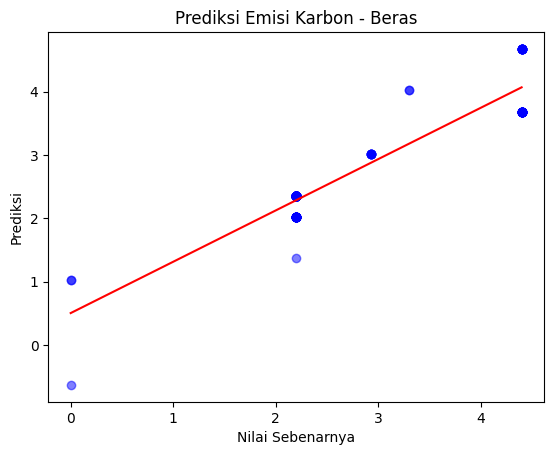

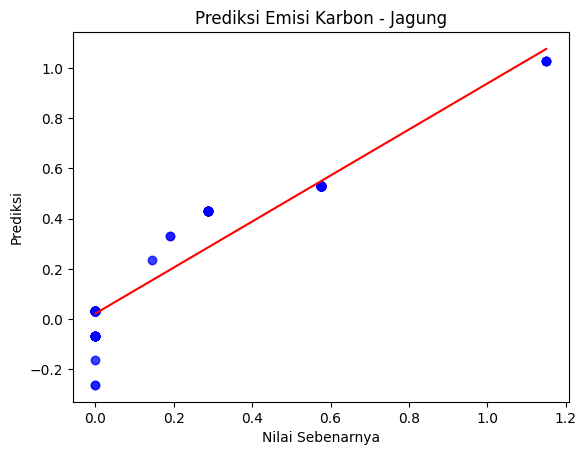

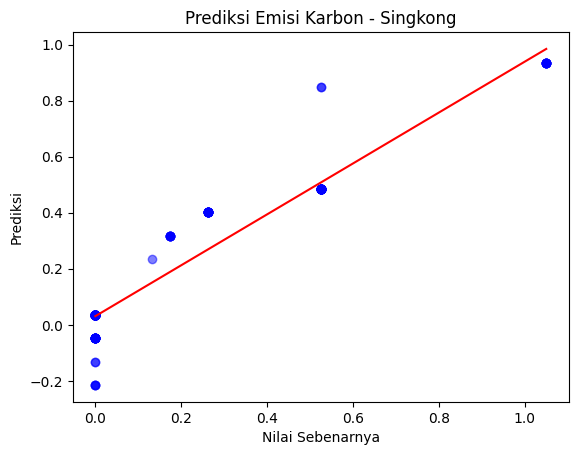

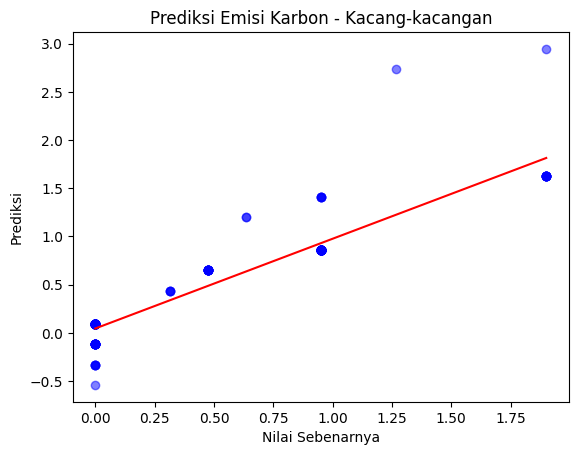

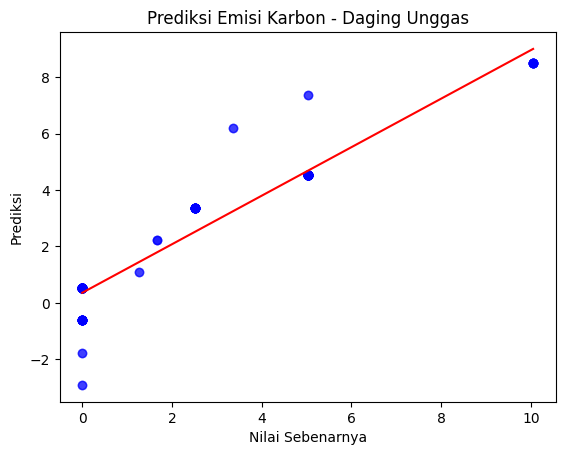

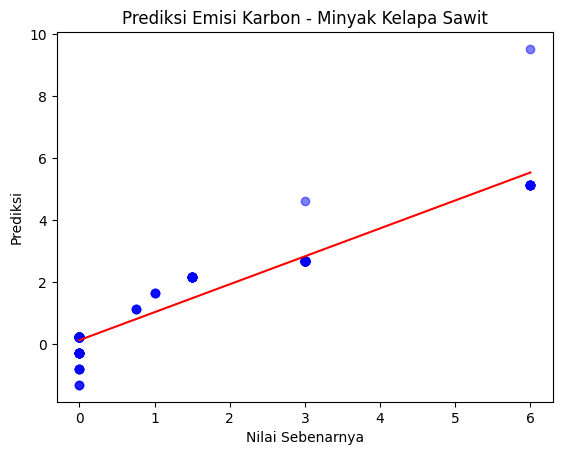

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Visualisasi dan garis regresi untuk beras
plt.scatter(beras_y_test, beras_y_pred, color='blue', alpha=0.5)
plt.plot(np.unique(beras_y_test), np.poly1d(np.polyfit(beras_y_test, beras_y_pred, 1))(np.unique(beras_y_test)), color='red')
plt.xlabel('Nilai Sebenarnya')
plt.ylabel('Prediksi')
plt.title('Prediksi Emisi Karbon - Beras')
plt.show()

# Visualisasi dan garis regresi untuk jagung
plt.scatter(jagung_y_test, jagung_y_pred, color='blue', alpha=0.5)
plt.plot(np.unique(jagung_y_test), np.poly1d(np.polyfit(jagung_y_test, jagung_y_pred, 1))(np.unique(jagung_y_test)), color='red')
plt.xlabel('Nilai Sebenarnya')
plt.ylabel('Prediksi')
plt.title('Prediksi Emisi Karbon - Jagung')
plt.show()

# Visualisasi dan garis regresi untuk singkong
plt.scatter(singkong_y_test, singkong_y_pred, color='blue', alpha=0.5)
plt.plot(np.unique(singkong_y_test), np.poly1d(np.polyfit(singkong_y_test, singkong_y_pred, 1))(np.unique(singkong_y_test)), color='red')
plt.xlabel('Nilai Sebenarnya')
plt.ylabel('Prediksi')
plt.title('Prediksi Emisi Karbon - Singkong')
plt.show()

# Visualisasi dan garis regresi untuk kacang-kacangan
plt.scatter(kacang_y_test, kacang_y_pred, color='blue', alpha=0.5)
plt.plot(np.unique(kacang_y_test), np.poly1d(np.polyfit(kacang_y_test, kacang_y_pred, 1))(np.unique(kacang_y_test)), color='red')
plt.xlabel('Nilai Sebenarnya')
plt.ylabel('Prediksi')
plt.title('Prediksi Emisi Karbon - Kacang-kacangan')
plt.show()

# Visualisasi dan garis regresi untuk daging unggas
plt.scatter(daging_y_test, daging_y_pred, color='blue', alpha=0.5)
plt.plot(np.unique(daging_y_test), np.poly1d(np.polyfit(daging_y_test, daging_y_pred, 1))(np.unique(daging_y_test)), color='red')
plt.xlabel('Nilai Sebenarnya')
plt.ylabel('Prediksi')
plt.title('Prediksi Emisi Karbon - Daging Unggas')
plt.show()

# Visualisasi dan garis regresi untuk minyak kelapa sawit
plt.scatter(minyak_y_test, minyak_y_pred, color='blue', alpha=0.5)
plt.plot(np.unique(minyak_y_test), np.poly1d(np.polyfit(minyak_y_test, minyak_y_pred, 1))(np.unique(minyak_y_test)), color='red')
plt.xlabel('Nilai Sebenarnya')
plt.ylabel('Prediksi')
plt.title('Prediksi Emisi Karbon - Minyak Kelapa Sawit')
plt.show()


# Membuat model Deep Learning. 
- model neural network dengan 3 layer untuk memprediksi emisi karbon dari konsumsi masing-masing makanan.
- menggunakan fungsi aktivasi relu pada layer pertama dan kedua, dan tidak menggunakan fungsi aktivasi pada layer output karena masalah regresi.
- Data diskalakan agar model dapat lebih efisien (menggunakan StandardScaler dari scikit-learn )

### BERAS

In [ ]:
# Standarisasi fitur dengan StandardScaler
scaler = StandardScaler()
beras_X_train_scaled = scaler.fit_transform(beras_X_train)
beras_X_test_scaled = scaler.transform(beras_X_test)

# Membuat model Sequential untuk beras
beras_model_tf = Sequential()
beras_model_tf.add(Dense(64, input_dim=beras_X_train_scaled.shape[1], activation='relu'))
beras_model_tf.add(Dense(32, activation='relu'))
beras_model_tf.add(Dense(1))
beras_model_tf.compile(loss='mean_squared_error', optimizer='adam')
beras_model_tf.fit(beras_X_train_scaled, beras_y_train, epochs=100, batch_size=32, validation_split=0.2)
beras_y_pred_tf = beras_model_tf.predict(beras_X_test_scaled)
beras_mse_tf = mean_squared_error(beras_y_test, beras_y_pred_tf)
print("Hasil evaluasi performa model TensorFlow untuk beras:")
print("MSE:", beras_mse_tf)


Epoch 1/100
19/19 [==============================] - 2s 20ms/step - loss: 6.3056 - val_loss: 5.3625
Epoch 2/100
19/19 [==============================] - 0s 16ms/step - loss: 3.9011 - val_loss: 3.0017
Epoch 3/100
19/19 [==============================] - 0s 8ms/step - loss: 2.1138 - val_loss: 1.6070
Epoch 4/100
19/19 [==============================] - 0s 7ms/step - loss: 1.0247 - val_loss: 0.8470
Epoch 5/100
19/19 [==============================] - 0s 9ms/step - loss: 0.6257 - val_loss: 0.5320
Epoch 6/100
19/19 [==============================] - 0s 7ms/step - loss: 0.4063 - val_loss: 0.3459
Epoch 7/100
19/19 [==============================] - 0s 7ms/step - loss: 0.2555 - val_loss: 0.2209
Epoch 8/100
19/19 [==============================] - 0s 9ms/step - loss: 0.1598 - val_loss: 0.1384
Epoch 9/100
19/19 [==============================] - 0s 9ms/step - loss: 0.1053 - val_loss: 0.0926
Epoch 10/100
19/19 [==============================] - 0s 9ms/step - loss: 0.0739 - val_loss: 0.0700
Epoch 1

6/6 [==============================] - 0s 4ms/step
Hasil evaluasi performa model TensorFlow untuk beras:
MSE: 6.73929563218168e-05


### Jagung

In [ ]:
# Standarisasi fitur dengan StandardScaler
jagung_X_train_scaled = scaler.fit_transform(jagung_X_train)
jagung_X_test_scaled = scaler.transform(jagung_X_test)

# Membuat model Sequential untuk jagung
jagung_model_tf = Sequential()
jagung_model_tf.add(Dense(64, input_dim=jagung_X_train_scaled.shape[1], activation='relu'))
jagung_model_tf.add(Dense(32, activation='relu'))
jagung_model_tf.add(Dense(1))
jagung_model_tf.compile(loss='mean_squared_error', optimizer='adam')
jagung_model_tf.fit(jagung_X_train_scaled, jagung_y_train, epochs=100, batch_size=32, validation_split=0.2)
jagung_y_pred_tf = jagung_model_tf.predict(jagung_X_test_scaled)
jagung_mse_tf = mean_squared_error(jagung_y_test, jagung_y_pred_tf)
print("Hasil evaluasi performa model TensorFlow untuk jagung:")
print("MSE:", jagung_mse_tf)

Epoch 1/100
19/19 [==============================] - 1s 11ms/step - loss: 0.2154 - val_loss: 0.0316
Epoch 2/100
19/19 [==============================] - 0s 4ms/step - loss: 0.0185 - val_loss: 0.0054
Epoch 3/100
19/19 [==============================] - 0s 4ms/step - loss: 0.0037 - val_loss: 0.0013
Epoch 4/100
19/19 [==============================] - 0s 4ms/step - loss: 0.0018 - val_loss: 8.2853e-04
Epoch 5/100
19/19 [==============================] - 0s 4ms/step - loss: 0.0011 - val_loss: 6.2754e-04
Epoch 6/100
19/19 [==============================] - 0s 5ms/step - loss: 8.5902e-04 - val_loss: 5.3456e-04
Epoch 7/100
19/19 [==============================] - 0s 5ms/step - loss: 7.3217e-04 - val_loss: 4.5580e-04
Epoch 8/100
19/19 [==============================] - 0s 4ms/step - loss: 6.0638e-04 - val_loss: 3.7210e-04
Epoch 9/100
19/19 [==============================] - 0s 4ms/step - loss: 5.2542e-04 - val_loss: 3.1607e-04
Epoch 10/100
19/19 [==============================] - 0s 4ms/step - 

6/6 [==============================] - 0s 2ms/step
Hasil evaluasi performa model TensorFlow untuk jagung:
MSE: 1.232616396065468e-15


### Singkong

In [ ]:
# Standarisasi fitur dengan StandardScaler
singkong_X_train_scaled = scaler.fit_transform(singkong_X_train)
singkong_X_test_scaled = scaler.transform(singkong_X_test)

# Membuat model Sequential untuk singkong
singkong_model_tf = Sequential()
singkong_model_tf.add(Dense(64, input_dim=singkong_X_train_scaled.shape[1], activation='relu'))
singkong_model_tf.add(Dense(32, activation='relu'))
singkong_model_tf.add(Dense(1))
singkong_model_tf.compile(loss='mean_squared_error', optimizer='adam')
singkong_model_tf.fit(singkong_X_train_scaled, singkong_y_train, epochs=100, batch_size=32, validation_split=0.2)
singkong_y_pred_tf = singkong_model_tf.predict(singkong_X_test_scaled)
singkong_mse_tf = mean_squared_error(singkong_y_test, singkong_y_pred_tf)
print("Hasil evaluasi performa model TensorFlow untuk singkong:")
print("MSE:", singkong_mse_tf)

Epoch 1/100
19/19 [==============================] - 1s 11ms/step - loss: 0.1022 - val_loss: 0.0123
Epoch 2/100
19/19 [==============================] - 0s 6ms/step - loss: 0.0041 - val_loss: 0.0037
Epoch 3/100
19/19 [==============================] - 0s 6ms/step - loss: 0.0017 - val_loss: 4.5634e-04
Epoch 4/100
19/19 [==============================] - 0s 7ms/step - loss: 3.9035e-04 - val_loss: 1.7851e-04
Epoch 5/100
19/19 [==============================] - 0s 6ms/step - loss: 1.2410e-04 - val_loss: 9.4307e-05
Epoch 6/100
19/19 [==============================] - 0s 7ms/step - loss: 8.6607e-05 - val_loss: 5.9218e-05
Epoch 7/100
19/19 [==============================] - 0s 6ms/step - loss: 6.4830e-05 - val_loss: 4.2869e-05
Epoch 8/100
19/19 [==============================] - 0s 6ms/step - loss: 5.0698e-05 - val_loss: 3.0319e-05
Epoch 9/100
19/19 [==============================] - 0s 6ms/step - loss: 4.2821e-05 - val_loss: 2.1029e-05
Epoch 10/100
19/19 [==============================] - 0s

### Kacang

In [ ]:
# Standarisasi fitur dengan StandardScaler
kacang_X_train_scaled = scaler.fit_transform(kacang_X_train)
kacang_X_test_scaled = scaler.transform(kacang_X_test)

# Membuat model Sequential untuk kacang-kacangan
kacang_model_tf = Sequential()
kacang_model_tf.add(Dense(64, input_dim=kacang_X_train_scaled.shape[1], activation='relu'))
kacang_model_tf.add(Dense(32, activation='relu'))
kacang_model_tf.add(Dense(1))
kacang_model_tf.compile(loss='mean_squared_error', optimizer='adam')
kacang_model_tf.fit(kacang_X_train_scaled, kacang_y_train, epochs=100, batch_size=32, validation_split=0.2)
kacang_y_pred_tf = kacang_model_tf.predict(kacang_X_test_scaled)
kacang_mse_tf = mean_squared_error(kacang_y_test, kacang_y_pred_tf)
print("Hasil evaluasi performa model TensorFlow untuk kacang-kacangan:")
print("MSE:", kacang_mse_tf)


Epoch 1/100
19/19 [==============================] - 1s 11ms/step - loss: 0.1346 - val_loss: 0.0283
Epoch 2/100
19/19 [==============================] - 0s 5ms/step - loss: 0.0287 - val_loss: 0.0079
Epoch 3/100
19/19 [==============================] - 0s 4ms/step - loss: 0.0131 - val_loss: 0.0043
Epoch 4/100
19/19 [==============================] - 0s 4ms/step - loss: 0.0068 - val_loss: 0.0023
Epoch 5/100
19/19 [==============================] - 0s 5ms/step - loss: 0.0039 - val_loss: 0.0016
Epoch 6/100
19/19 [==============================] - 0s 4ms/step - loss: 0.0026 - val_loss: 0.0014
Epoch 7/100
19/19 [==============================] - 0s 4ms/step - loss: 0.0020 - val_loss: 0.0011
Epoch 8/100
19/19 [==============================] - 0s 4ms/step - loss: 0.0015 - val_loss: 7.8957e-04
Epoch 9/100
19/19 [==============================] - 0s 5ms/step - loss: 0.0011 - val_loss: 5.2077e-04
Epoch 10/100
19/19 [==============================] - 0s 5ms/step - loss: 7.1161e-04 - val_loss: 4.7

### Daging

In [ ]:
# Standarisasi fitur dengan StandardScaler
daging_X_train_scaled = scaler.fit_transform(daging_X_train)
daging_X_test_scaled = scaler.transform(daging_X_test)

# Membuat model Sequential untuk daging unggas
daging_model_tf = Sequential()
daging_model_tf.add(Dense(64, input_dim=daging_X_train_scaled.shape[1], activation='relu'))
daging_model_tf.add(Dense(32, activation='relu'))
daging_model_tf.add(Dense(1))
daging_model_tf.compile(loss='mean_squared_error', optimizer='adam')
daging_model_tf.fit(daging_X_train_scaled, daging_y_train, epochs=100, batch_size=32, validation_split=0.2)
daging_y_pred_tf = daging_model_tf.predict(daging_X_test_scaled)
daging_mse_tf = mean_squared_error(daging_y_test, daging_y_pred_tf)
print("Hasil evaluasi performa model TensorFlow untuk daging unggas:")
print("MSE:", daging_mse_tf)



Epoch 1/100
19/19 [==============================] - 1s 10ms/step - loss: 11.6786 - val_loss: 15.7025
Epoch 2/100
19/19 [==============================] - 0s 5ms/step - loss: 9.3642 - val_loss: 12.2599
Epoch 3/100
19/19 [==============================] - 0s 4ms/step - loss: 6.8068 - val_loss: 8.0266
Epoch 4/100
19/19 [==============================] - 0s 5ms/step - loss: 3.8592 - val_loss: 3.6674
Epoch 5/100
19/19 [==============================] - 0s 4ms/step - loss: 1.5690 - val_loss: 1.0476
Epoch 6/100
19/19 [==============================] - 0s 5ms/step - loss: 0.5592 - val_loss: 0.3725
Epoch 7/100
19/19 [==============================] - 0s 3ms/step - loss: 0.3021 - val_loss: 0.2718
Epoch 8/100
19/19 [==============================] - 0s 4ms/step - loss: 0.2238 - val_loss: 0.2348
Epoch 9/100
19/19 [==============================] - 0s 4ms/step - loss: 0.1778 - val_loss: 0.2025
Epoch 10/100
19/19 [==============================] - 0s 3ms/step - loss: 0.1525 - val_loss: 0.1813
Epoch

### Minyak

In [ ]:
# Standarisasi fitur dengan StandardScaler
minyak_X_train_scaled = scaler.fit_transform(minyak_X_train)
minyak_X_test_scaled = scaler.transform(minyak_X_test)

# Membuat model Sequential untuk minyak kelapa sawit
minyak_model_tf = Sequential()
minyak_model_tf.add(Dense(64, input_dim=minyak_X_train_scaled.shape[1], activation='relu'))
minyak_model_tf.add(Dense(32, activation='relu'))
minyak_model_tf.add(Dense(1))
minyak_model_tf.compile(loss='mean_squared_error', optimizer='adam')
minyak_model_tf.fit(minyak_X_train_scaled, minyak_y_train, epochs=100, batch_size=32, validation_split=0.2)
minyak_y_pred_tf = minyak_model_tf.predict(minyak_X_test_scaled)
minyak_mse_tf = mean_squared_error(minyak_y_test, minyak_y_pred_tf)
print("Hasil evaluasi performa model TensorFlow untuk minyak kelapa sawit:")
print("MSE:", minyak_mse_tf)


Epoch 1/100
19/19 [==============================] - 1s 17ms/step - loss: 4.1085 - val_loss: 3.6042
Epoch 2/100
19/19 [==============================] - 0s 5ms/step - loss: 3.1256 - val_loss: 2.6723
Epoch 3/100
19/19 [==============================] - 0s 5ms/step - loss: 2.0917 - val_loss: 1.5498
Epoch 4/100
19/19 [==============================] - 0s 5ms/step - loss: 1.0050 - val_loss: 0.5553
Epoch 5/100
19/19 [==============================] - 0s 5ms/step - loss: 0.2747 - val_loss: 0.1000
Epoch 6/100
19/19 [==============================] - 0s 7ms/step - loss: 0.0901 - val_loss: 0.0386
Epoch 7/100
19/19 [==============================] - 0s 5ms/step - loss: 0.0545 - val_loss: 0.0259
Epoch 8/100
19/19 [==============================] - 0s 5ms/step - loss: 0.0395 - val_loss: 0.0178
Epoch 9/100
19/19 [==============================] - 0s 6ms/step - loss: 0.0303 - val_loss: 0.0140
Epoch 10/100
19/19 [==============================] - 0s 8ms/step - loss: 0.0235 - val_loss: 0.0115
Epoch 11

In [ ]:
# Membuat model Sequential untuk beras
beras_model = Sequential()
beras_model.add(Dense(64, input_dim=beras_X_train_scaled.shape[1], activation='relu'))
beras_model.add(Dense(32, activation='relu'))
beras_model.add(Dense(1))
beras_model.compile(loss='mean_squared_error', optimizer='adam')
beras_model.fit(beras_X_train_scaled, beras_y_train, epochs=100, batch_size=32, validation_split=0.2)

# Simpan model untuk Beras
beras_model.save('new_model_beras.h5')


Epoch 1/100
19/19 [==============================] - 1s 13ms/step - loss: 6.1575 - val_loss: 5.5598
Epoch 2/100
19/19 [==============================] - 0s 5ms/step - loss: 4.3088 - val_loss: 3.6762
Epoch 3/100
19/19 [==============================] - 0s 5ms/step - loss: 2.7910 - val_loss: 2.3029
Epoch 4/100
19/19 [==============================] - 0s 5ms/step - loss: 1.4826 - val_loss: 1.1319
Epoch 5/100
19/19 [==============================] - 0s 5ms/step - loss: 0.7615 - val_loss: 0.6589
Epoch 6/100
19/19 [==============================] - 0s 4ms/step - loss: 0.5074 - val_loss: 0.4086
Epoch 7/100
19/19 [==============================] - 0s 5ms/step - loss: 0.3336 - val_loss: 0.2825
Epoch 8/100
19/19 [==============================] - 0s 5ms/step - loss: 0.2358 - val_loss: 0.1978
Epoch 9/100
19/19 [==============================] - 0s 4ms/step - loss: 0.1686 - val_loss: 0.1493
Epoch 10/100
19/19 [==============================] - 0s 6ms/step - loss: 0.1273 - val_loss: 0.1152
Epoch 11

In [ ]:
# Model untuk Jagung
jagung_model = Sequential()
jagung_model.add(Dense(64, input_dim=jagung_X_train_scaled.shape[1], activation='relu'))
jagung_model.add(Dense(32, activation='relu'))
jagung_model.add(Dense(1))
jagung_model.compile(loss='mean_squared_error', optimizer='adam')
jagung_model.fit(jagung_X_train_scaled, jagung_y_train, epochs=100, batch_size=32, validation_split=0.2)

# Simpan model untuk Jagung
jagung_model.save('new_model_jagung.h5')

Epoch 1/100
19/19 [==============================] - 1s 20ms/step - loss: 0.0788 - val_loss: 0.0112
Epoch 2/100
19/19 [==============================] - 0s 7ms/step - loss: 0.0055 - val_loss: 0.0013
Epoch 3/100
19/19 [==============================] - 0s 7ms/step - loss: 0.0016 - val_loss: 7.0486e-04
Epoch 4/100
19/19 [==============================] - 0s 8ms/step - loss: 5.1705e-04 - val_loss: 2.3171e-04
Epoch 5/100
19/19 [==============================] - 0s 8ms/step - loss: 2.2950e-04 - val_loss: 1.1533e-04
Epoch 6/100
19/19 [==============================] - 0s 8ms/step - loss: 1.1880e-04 - val_loss: 5.7015e-05
Epoch 7/100
19/19 [==============================] - 0s 8ms/step - loss: 6.5144e-05 - val_loss: 3.3518e-05
Epoch 8/100
19/19 [==============================] - 0s 8ms/step - loss: 3.5615e-05 - val_loss: 1.7682e-05
Epoch 9/100
19/19 [==============================] - 0s 8ms/step - loss: 1.8422e-05 - val_loss: 1.0052e-05
Epoch 10/100
19/19 [==============================] - 0s

In [ ]:
# Model untuk Singkong
singkong_model = Sequential()
singkong_model.add(Dense(64, input_dim=singkong_X_train_scaled.shape[1], activation='relu'))
singkong_model.add(Dense(32, activation='relu'))
singkong_model.add(Dense(1))
singkong_model.compile(loss='mean_squared_error', optimizer='adam')
singkong_model.fit(singkong_X_train_scaled, singkong_y_train, epochs=100, batch_size=32, validation_split=0.2)

# Simpan model untuk Singkong
singkong_model.save('new_model_singkong.h5')

Epoch 1/100
19/19 [==============================] - 1s 11ms/step - loss: 0.0727 - val_loss: 0.0177
Epoch 2/100
19/19 [==============================] - 0s 5ms/step - loss: 0.0083 - val_loss: 0.0013
Epoch 3/100
19/19 [==============================] - 0s 5ms/step - loss: 0.0010 - val_loss: 9.0590e-04
Epoch 4/100
19/19 [==============================] - 0s 5ms/step - loss: 5.2617e-04 - val_loss: 4.1693e-04
Epoch 5/100
19/19 [==============================] - 0s 4ms/step - loss: 2.8813e-04 - val_loss: 2.3794e-04
Epoch 6/100
19/19 [==============================] - 0s 4ms/step - loss: 1.8820e-04 - val_loss: 1.4434e-04
Epoch 7/100
19/19 [==============================] - 0s 7ms/step - loss: 1.1119e-04 - val_loss: 9.1630e-05
Epoch 8/100
19/19 [==============================] - 0s 6ms/step - loss: 7.2478e-05 - val_loss: 5.7981e-05
Epoch 9/100
19/19 [==============================] - 0s 6ms/step - loss: 4.1296e-05 - val_loss: 3.2649e-05
Epoch 10/100
19/19 [==============================] - 0s

In [ ]:
# Model untuk Kacang-kacangan
kacang_model = Sequential()
kacang_model.add(Dense(64, input_dim=kacang_X_train_scaled.shape[1], activation='relu'))
kacang_model.add(Dense(32, activation='relu'))
kacang_model.add(Dense(1))
kacang_model.compile(loss='mean_squared_error', optimizer='adam')
kacang_model.fit(kacang_X_train_scaled, kacang_y_train, epochs=100, batch_size=32, validation_split=0.2)

# Simpan model untuk Kacang-kacangan
kacang_model.save('new_model_kacang.h5')

Epoch 1/100
19/19 [==============================] - 1s 16ms/step - loss: 0.2270 - val_loss: 0.0963
Epoch 2/100
19/19 [==============================] - 0s 5ms/step - loss: 0.0414 - val_loss: 0.0119
Epoch 3/100
19/19 [==============================] - 0s 5ms/step - loss: 0.0115 - val_loss: 0.0023
Epoch 4/100
19/19 [==============================] - 0s 5ms/step - loss: 0.0036 - val_loss: 0.0016
Epoch 5/100
19/19 [==============================] - 0s 4ms/step - loss: 0.0019 - val_loss: 0.0015
Epoch 6/100
19/19 [==============================] - 0s 5ms/step - loss: 0.0013 - val_loss: 9.9542e-04
Epoch 7/100
19/19 [==============================] - 0s 5ms/step - loss: 8.3429e-04 - val_loss: 7.4542e-04
Epoch 8/100
19/19 [==============================] - 0s 4ms/step - loss: 6.4552e-04 - val_loss: 6.4405e-04
Epoch 9/100
19/19 [==============================] - 0s 4ms/step - loss: 5.2089e-04 - val_loss: 4.7460e-04
Epoch 10/100
19/19 [==============================] - 0s 4ms/step - loss: 4.0281

In [ ]:
# Model untuk Daging
daging_model = Sequential()
daging_model.add(Dense(64, input_dim=daging_X_train_scaled.shape[1], activation='relu'))
daging_model.add(Dense(32, activation='relu'))
daging_model.add(Dense(1))
daging_model.compile(loss='mean_squared_error', optimizer='adam')
daging_model.fit(daging_X_train_scaled, daging_y_train, epochs=100, batch_size=32, validation_split=0.2)

# Simpan model untuk Daging
daging_model.save('new_model_daging.h5')

Epoch 1/100
19/19 [==============================] - 1s 20ms/step - loss: 11.9229 - val_loss: 16.4736
Epoch 2/100
19/19 [==============================] - 0s 7ms/step - loss: 9.8037 - val_loss: 13.1974
Epoch 3/100
19/19 [==============================] - 0s 7ms/step - loss: 7.3725 - val_loss: 8.9515
Epoch 4/100
19/19 [==============================] - 0s 6ms/step - loss: 4.5585 - val_loss: 4.5028
Epoch 5/100
19/19 [==============================] - 0s 6ms/step - loss: 2.0513 - val_loss: 1.4859
Epoch 6/100
19/19 [==============================] - 0s 6ms/step - loss: 0.7130 - val_loss: 0.4673
Epoch 7/100
19/19 [==============================] - 0s 6ms/step - loss: 0.3414 - val_loss: 0.2680
Epoch 8/100
19/19 [==============================] - 0s 6ms/step - loss: 0.2093 - val_loss: 0.2181
Epoch 9/100
19/19 [==============================] - 0s 6ms/step - loss: 0.1633 - val_loss: 0.1914
Epoch 10/100
19/19 [==============================] - 0s 6ms/step - loss: 0.1334 - val_loss: 0.1669
Epoch

In [ ]:
# Model untuk Minyak Kelapa Sawit
minyak_model = Sequential()
minyak_model.add(Dense(64, input_dim=minyak_X_train_scaled.shape[1], activation='relu'))
minyak_model.add(Dense(32, activation='relu'))
minyak_model.add(Dense(1))
minyak_model.compile(loss='mean_squared_error', optimizer='adam')
minyak_model.fit(minyak_X_train_scaled, minyak_y_train, epochs=100, batch_size=32, validation_split=0.2)

# Simpan model untuk Minyak Kelapa Sawit
minyak_model.save('new_model_minyak.h5')

Epoch 1/100
19/19 [==============================] - 1s 12ms/step - loss: 3.8515 - val_loss: 3.2047
Epoch 2/100
19/19 [==============================] - 0s 4ms/step - loss: 2.5591 - val_loss: 1.9495
Epoch 3/100
19/19 [==============================] - 0s 5ms/step - loss: 1.3438 - val_loss: 0.8079
Epoch 4/100
19/19 [==============================] - 0s 6ms/step - loss: 0.4324 - val_loss: 0.1442
Epoch 5/100
19/19 [==============================] - 0s 4ms/step - loss: 0.0872 - val_loss: 0.0324
Epoch 6/100
19/19 [==============================] - 0s 5ms/step - loss: 0.0508 - val_loss: 0.0244
Epoch 7/100
19/19 [==============================] - 0s 5ms/step - loss: 0.0415 - val_loss: 0.0220
Epoch 8/100
19/19 [==============================] - 0s 4ms/step - loss: 0.0384 - val_loss: 0.0204
Epoch 9/100
19/19 [==============================] - 0s 5ms/step - loss: 0.0356 - val_loss: 0.0196
Epoch 10/100
19/19 [==============================] - 0s 5ms/step - loss: 0.0335 - val_loss: 0.0185
Epoch 11

In [ ]:
# Load model
beras_model_loaded = load_model('new_model_beras.h5')

# Data baru
num_people_beras_new = 1
consumption_beras_new = 1

# Skala data baru menggunakan scaler yang sama
beras_data_new = scaler.transform([[num_people_beras_new, consumption_beras_new]])

# Prediksi emisi karbon menggunakan model
emission_beras_pred = beras_model_loaded.predict(beras_data_new)

# Menampilkan hasil prediksi
print("Prediksi Emisi Karbon Beras:", emission_beras_pred)

1/1 [==============================] - 0s 101ms/step
Prediksi Emisi Karbon Beras: [[14.75789]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
